In [15]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

import util_functions as fs
import imp
imp.reload(fs)

%matplotlib inline

In [16]:
#Read Image
sheets = fs.get_images('./data/Tab_Butterfly-Waltz-Ukulele', resize_factor=1.0, threshold=200)

>>> Folder : ./data/Tab_Butterfly-Waltz-Ukulele : 2 files
01 : ./data/Tab_Butterfly-Waltz-Ukulele/p1.jpg : (2339, 1653)
02 : ./data/Tab_Butterfly-Waltz-Ukulele/p2.jpg : (2339, 1653)
>>> Inverse binary thresholding with threshold value 200


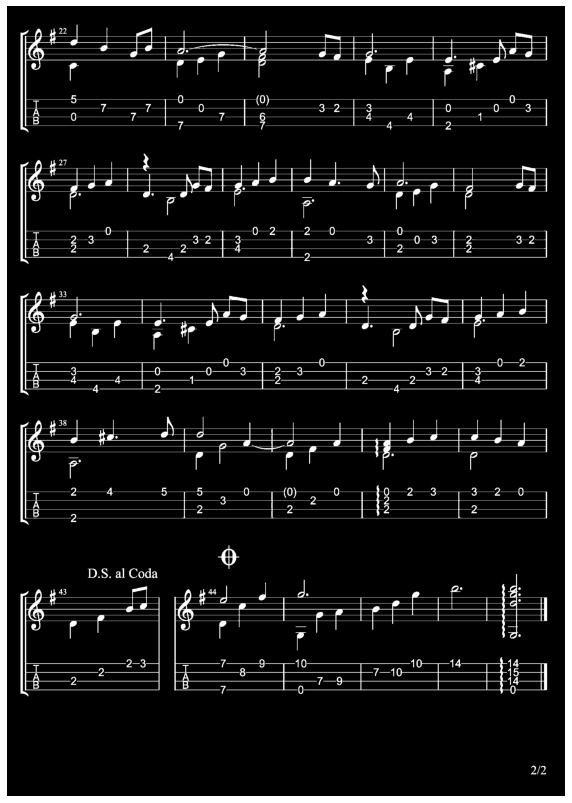

In [17]:
fs.plot_single_image(sheets[1])

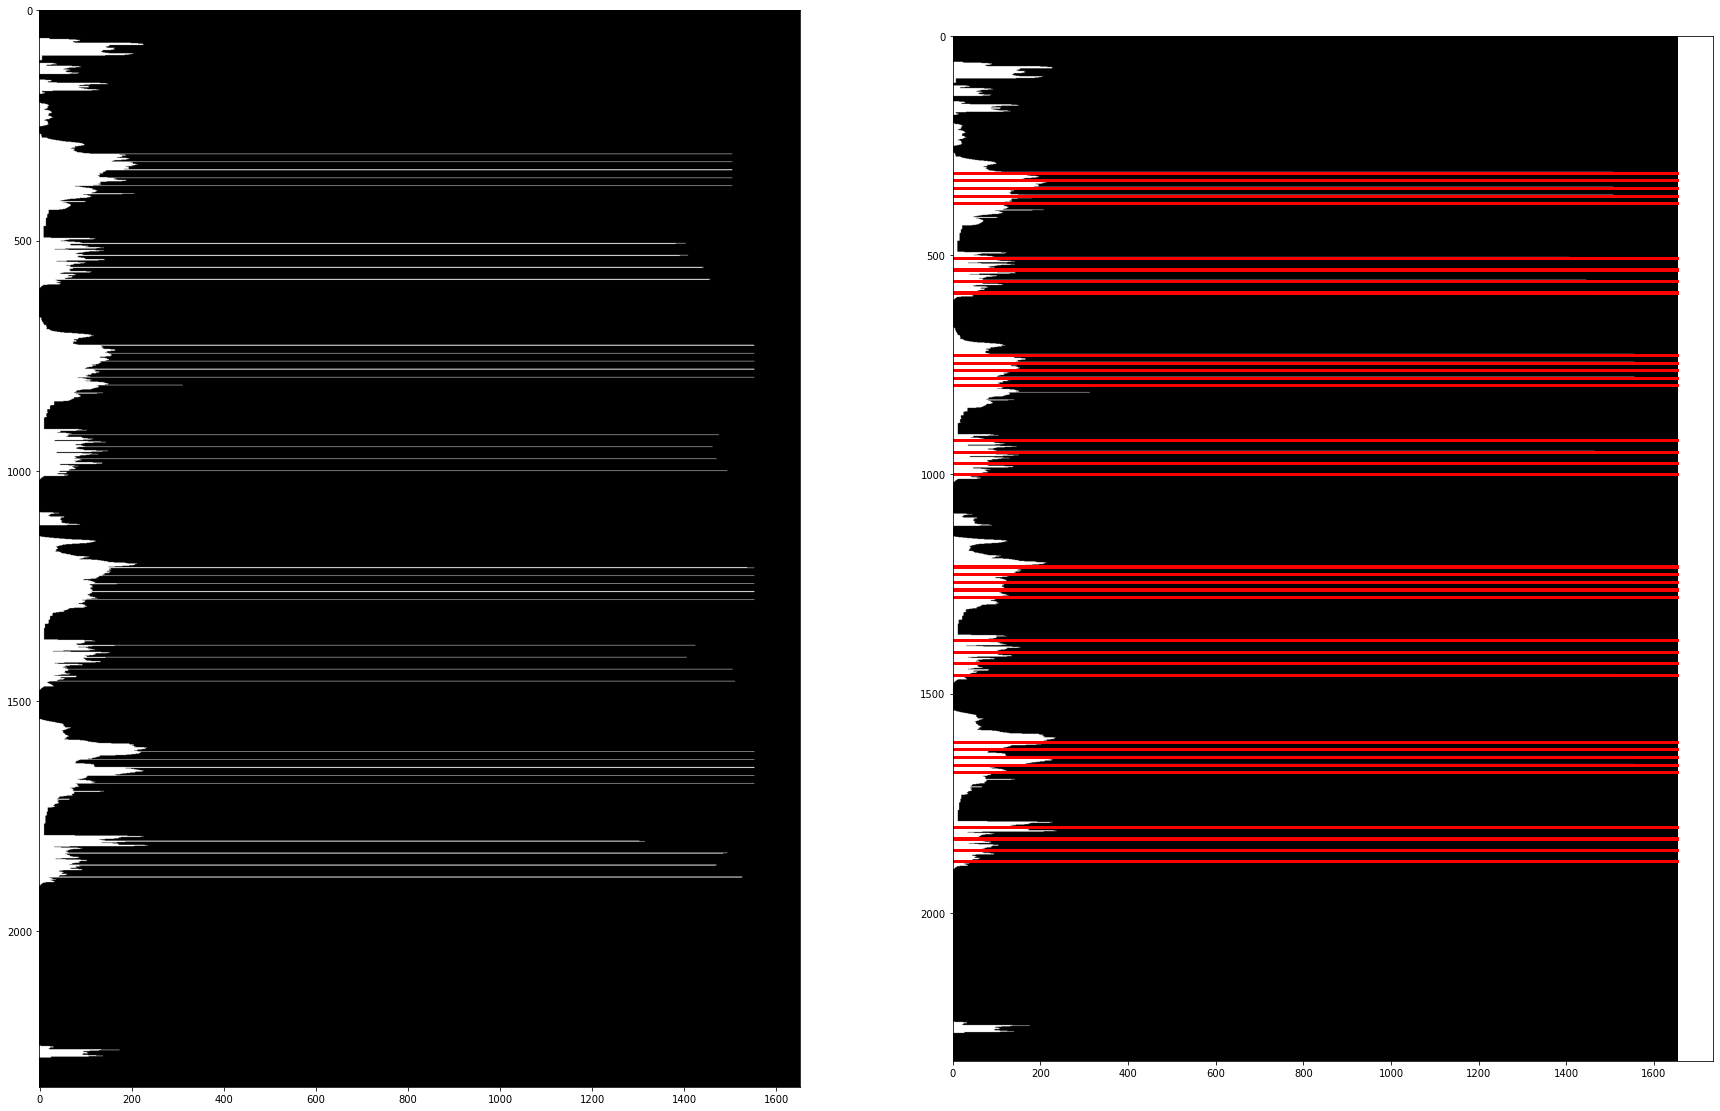

In [18]:
#Find lines
sample_image = np.uint8(sheets[1]/255)
image_height, image_width = sample_image.shape
width_threshold = 0.6

pix_hist = np.sum(sample_image_, axis=1)
pix_hist_image = np.zeros(sheets[1].shape)

for row, num in enumerate(pix_hist):
    pix_hist_image[row,:num] = 255

    
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(pix_hist_image, cmap='gray')

std_grid = [0, 20, 40, 60, 80, 100]
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(pix_hist_image, cmap='gray')
for row, num in enumerate(pix_hist):
    if num > image_width*width_threshold:
        ax2.plot([0, image_width], [row, row], '-r', linewidth=3)

plt.show()

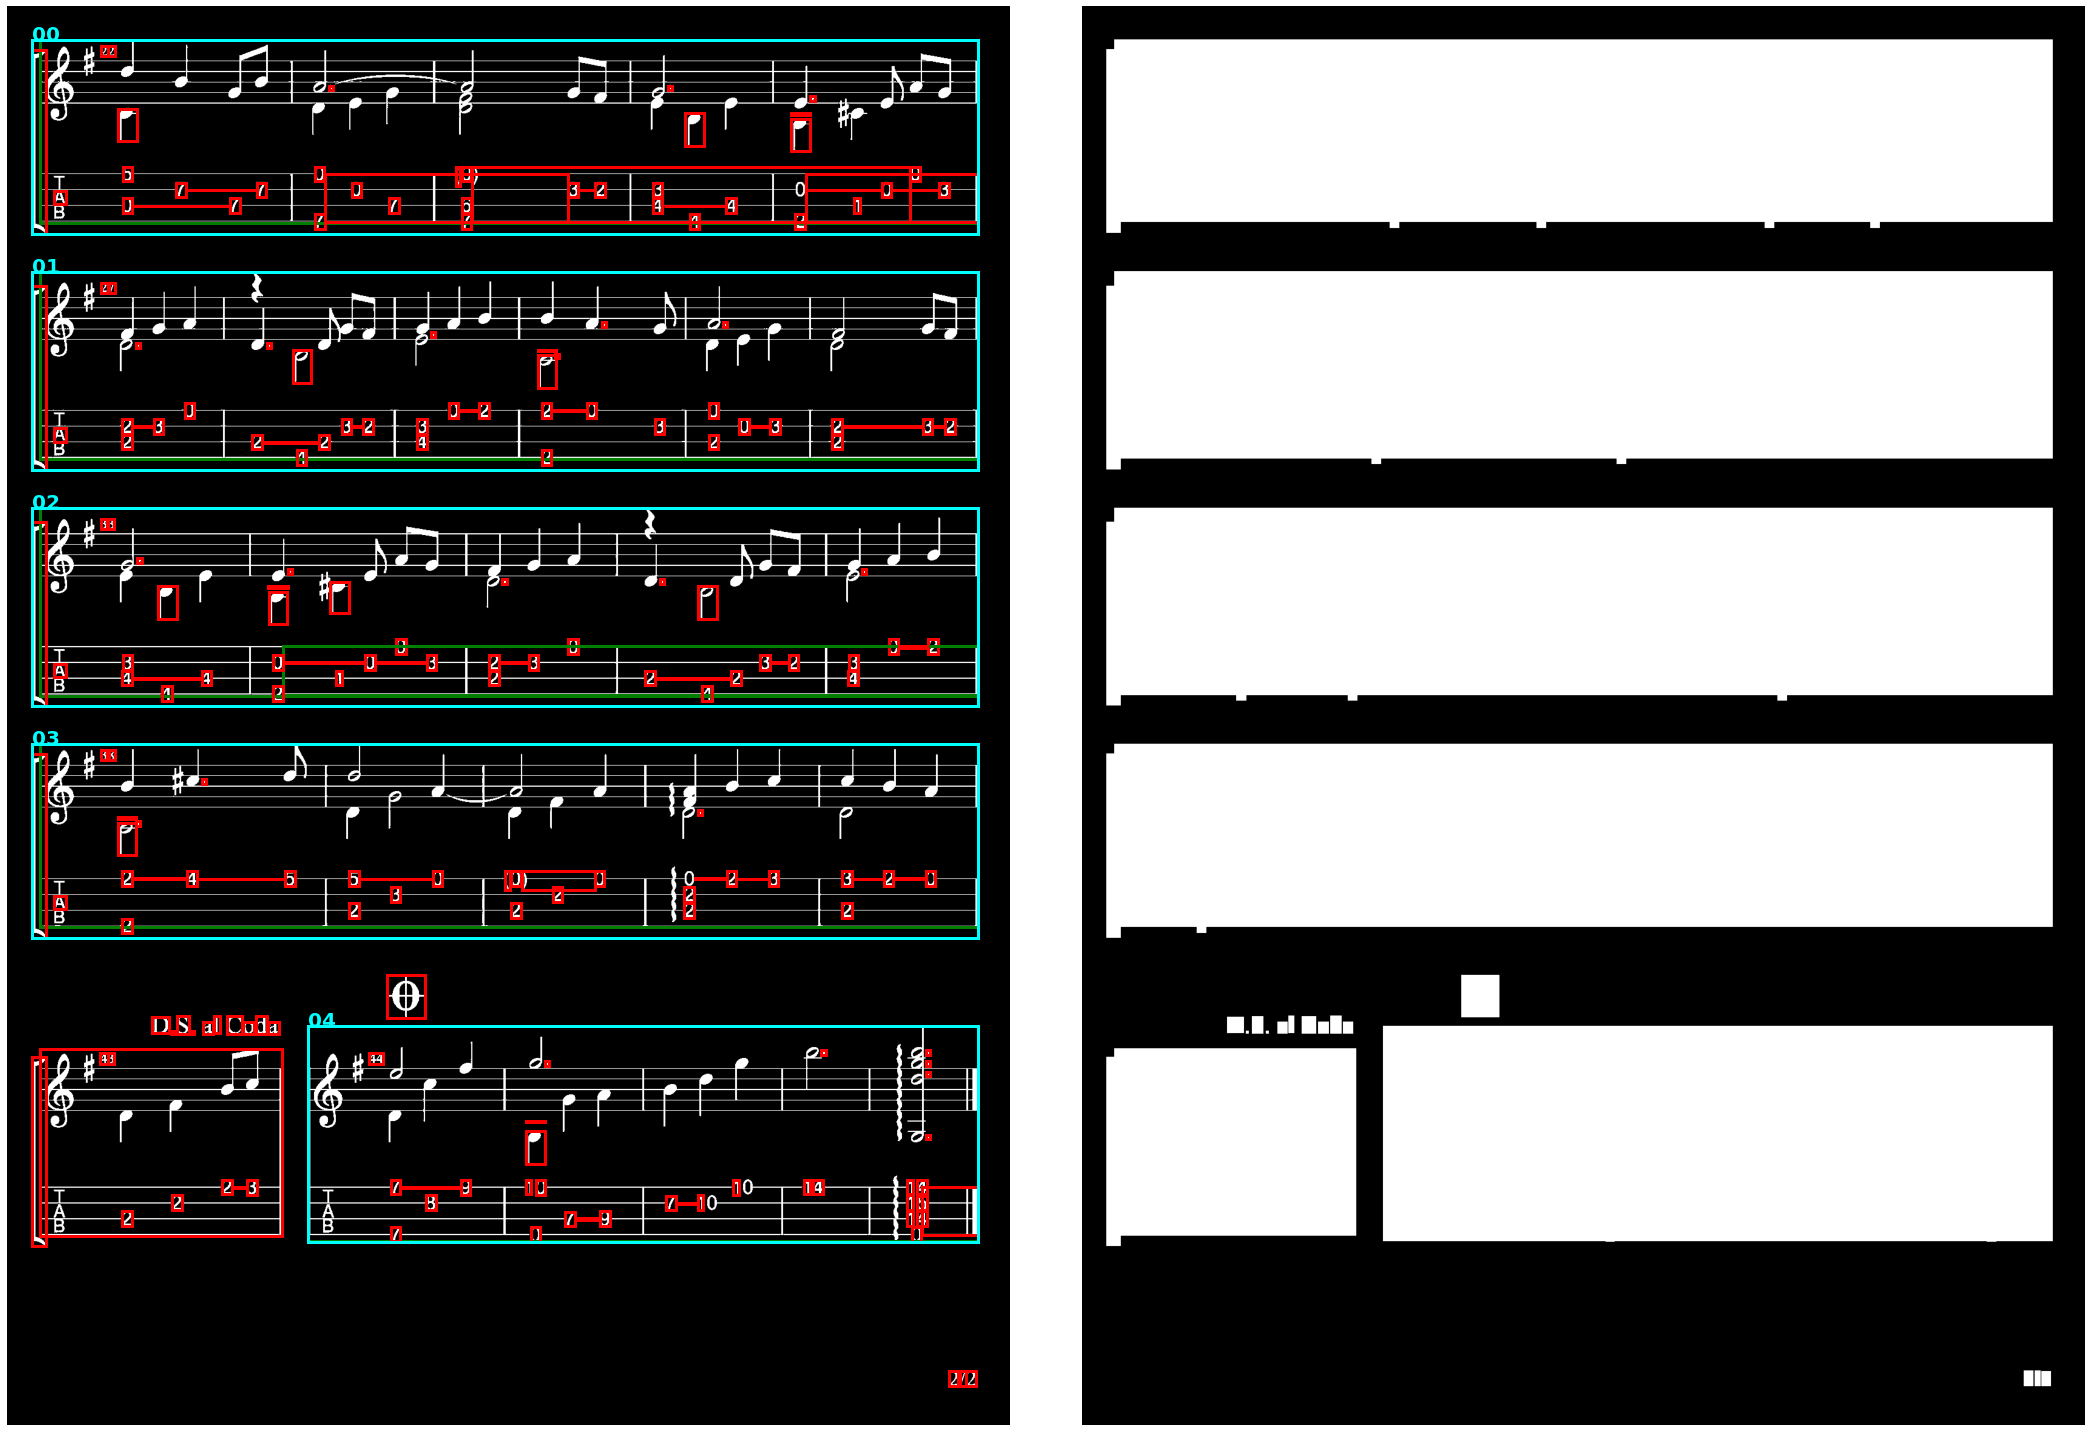

In [21]:
#Find Object
import matplotlib.patches as patches

numObj, labels, stats, centroids = cv2.connectedComponentsWithStats(sheets[1])

image_height, image_width = sheets[1].shape
width_threshold = 0.6

mask = np.zeros(sheets[1].shape)

fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(sheets[1], cmap='gray'); ax1.axis('off')

for i in range(1, numObj):
    x, y, w, h, area = stats[i] #stats[i] == (x, y, w, h, area)
    if w > image_width*width_threshold:
        eColor = 'green'
    else:
        eColor = 'red'
    ax1.add_patch(patches.Rectangle((x, y), w, h, edgecolor=eColor, fill=False, linewidth=3))       
    
    mask[y:y+h, x:x+w] = 255
mask = np.uint8(mask)
    
ax2 = fig.add_subplot(1, 2, 2)

ax2.imshow(mask, cmap='gray'); ax2.axis('off')

numObj, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)
main_obj = stats[stats[:,2]>image_width*width_threshold,:][1:,:]

for i, (x, y, w, h, area) in enumerate(main_obj):
    ax1.add_patch(patches.Rectangle((x, y), w, h, edgecolor='cyan', fill=False, linewidth=3))
    ax1.text(x, y, f'{i:02d}', color='cyan', fontsize=20, fontweight='bold')

fig.set_tight_layout(True)
plt.show()

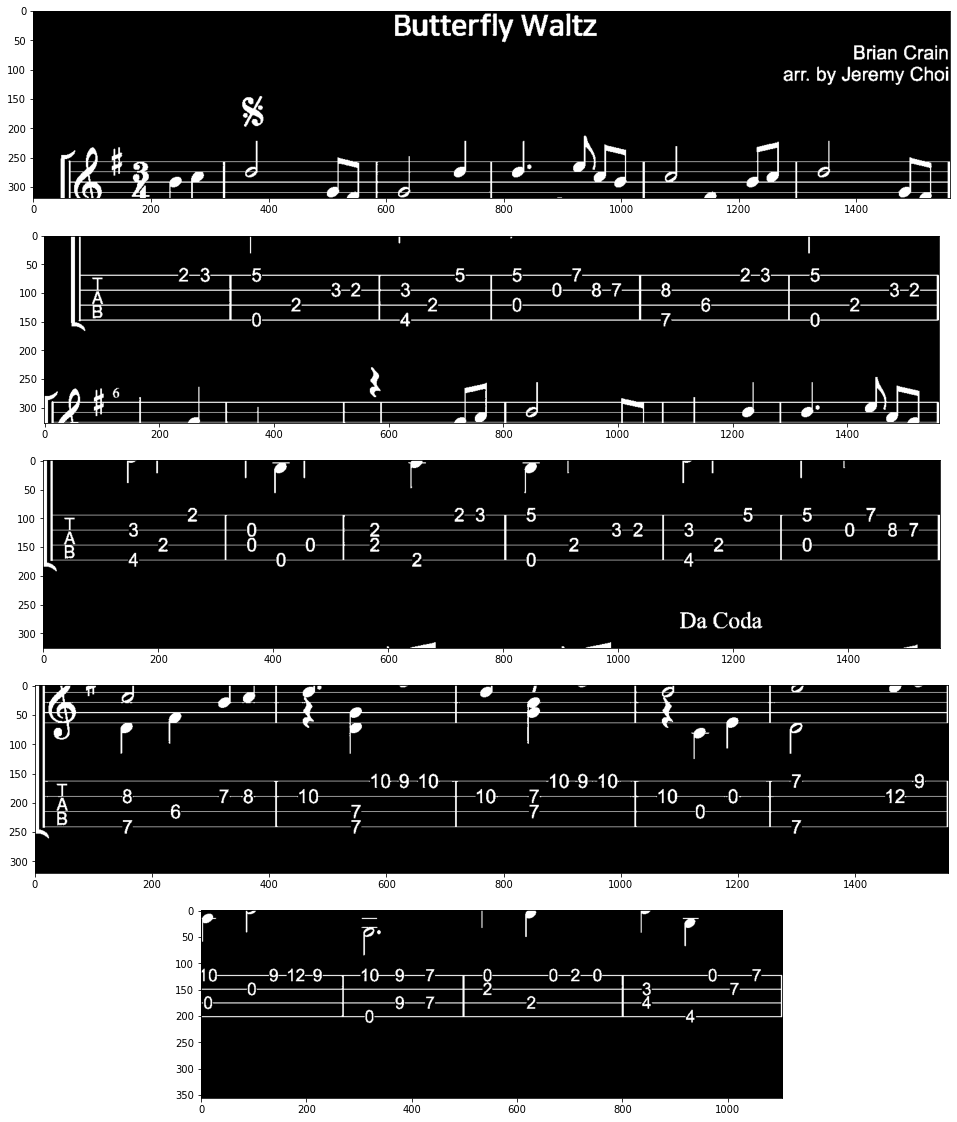

In [22]:
fig = plt.figure(figsize=(30, 20))

for i in range(len(main_obj)):
    ax = fig.add_subplot(len(main_obj), 1, i+1)
    x, y, w, h, _ = main_obj[i]
    ax.imshow(sheets[0][y:y+h, x:x+w], cmap='gray')
    
#fig.set_tight_layout(True)
plt.show()